In [48]:
import pandas as pd
import os
import nltk
names = pd.read_excel('African Names.xlsx')
names = names[['Name',"Gender"]]

In [49]:
names.head()
names.shape
names =names.dropna()
names.isnull().sum()
names.head()

,Name,Gender
0,kamau,male
1,gatang'i,male
2,karanja,male
3,Absko,Boy
4,Abuya,Girl


In [50]:
#Names = [(name, 'male') for name in nltk.corpus.names.words("male.txt")]
#Names += [(name, 'female') for name in nltk.corpus.names.words("female.txt")]
NameS = [(i,"male") for i in nltk.corpus.names.words("male.txt")]+[(i,"Female") for i in nltk.corpus.names.words("female.txt")]
import random
random.shuffle(NameS)
df =pd.DataFrame(NameS,columns =["Name","Gender"])
print(df.shape)
df.to_csv('English_Names.csv')
df.head()

(7944, 2)


,Name,Gender
0,Maurice,male
1,Nadya,Female
2,Charlie,male
3,Cherida,Female
4,Henrieta,Female


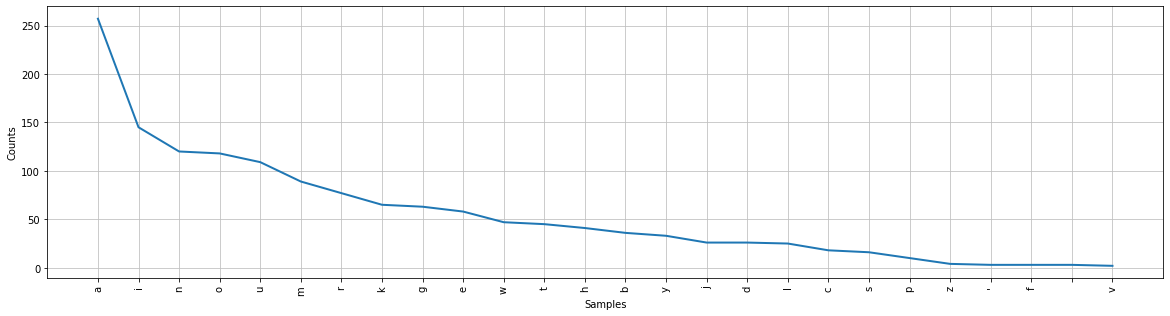

In [51]:
#some Analysisand data cleaning
names["Gender"]=[str(i).lower() for i in names.Gender]
names["Gender"]=["male" if i =="mae" or i=="boy" else "female" if i =="girl" else i for i in names.Gender]
names["Name"] = [str(i).lower() for i in names.Name]
names =names.dropna()

#split the names into letters to show the distribution
x = []
for i in names["Name"]:
    for j in i:
        x.append(j)
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
Y =FreqDist(x)
plt.figure(figsize = (20,5))
Y.plot(100)
plt.show()

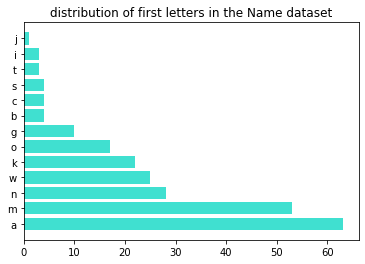

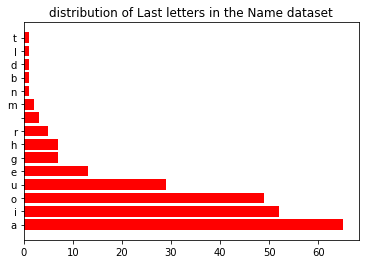

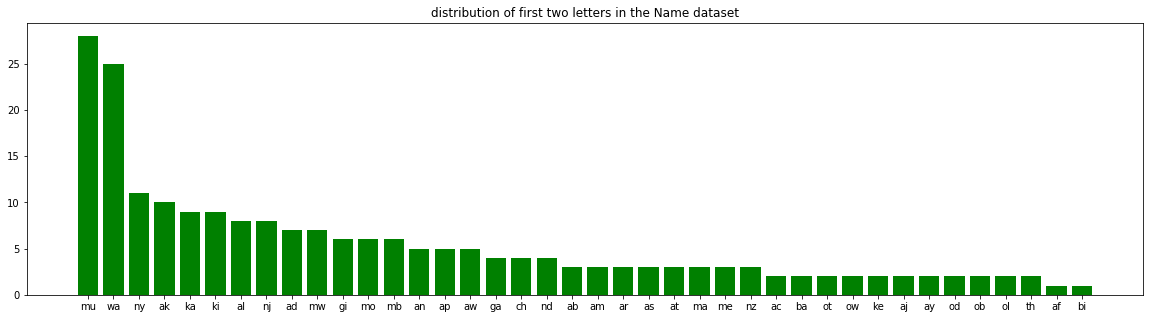

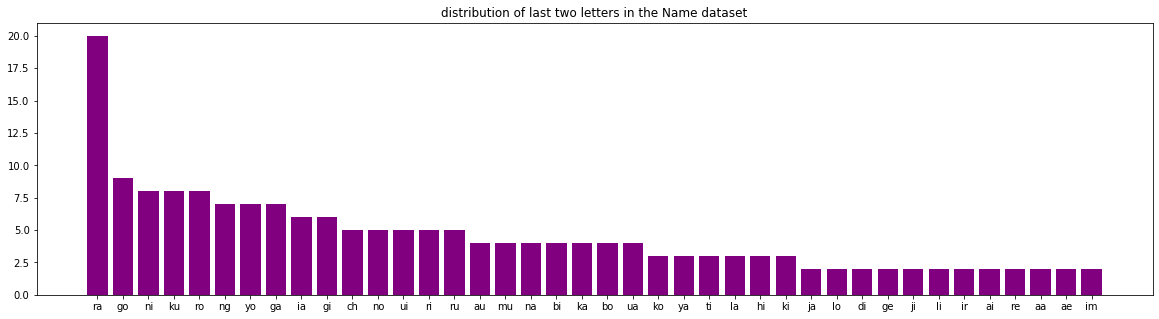

In [52]:

from collections import Counter

#some Analysis
B = [i[0] for i in names.Name ]
B =Counter(B)
B =dict(B.most_common(15))
plt.barh(list(B.keys()),list(B.values()),color="turquoise")
plt.title("distribution of first letters in the Name dataset")
plt.show()

B = [i[-1] for i in names.Name ]
B =Counter(B)
B =dict(B.most_common(15))
plt.barh(list(B.keys()),list(B.values()),color="red")
plt.title("distribution of Last letters in the Name dataset")
plt.show()

#Prefix (2)
plt.figure(figsize =(20,5))
B = [i[:2] for i in names.Name ]
B =Counter(B)
B =dict(B.most_common(40))
plt.bar(list(B.keys()),list(B.values()),color="green")
plt.title("distribution of first two letters in the Name dataset")
plt.show()

#Sufix start
plt.figure(figsize =(20,5))
B = [i[-2:] for i in names.Name ]
B =Counter(B)
B =dict(B.most_common(40))
plt.bar(list(B.keys()),list(B.values()),color="purple")
plt.title("distribution of last two letters in the Name dataset")
plt.show()


In [53]:
def extract_gender_features(name):
    """Takes a name and returns a list with features based on these names"""
    name = name.lower()
    features = {}
    features["suffix"] = name[-1:]
    features["suffix2"] = name[-2:] if len(name) > 1 else name[0]
    features["suffix3"] = name[-3:] if len(name) > 2 else name[0]
    #features["suffix4"] = name[-4:] if len(name) > 3 else name[0]
    #features["suffix5"] = name[-5:] if len(name) > 4 else name[0]
    features["suffix6"] = name[-6:] if len(name) > 5 else name[0]
    features["prefix"] = name[:1]
    features["prefix2"] = name[:2] if len(name) > 1 else name[0]
    features["prefix3"] = name[:3] if len(name) > 2 else name[0]
    features["prefix4"] = name[:4] if len(name) > 3 else name[0]
    features["prefix5"] = name[:5] if len(name) > 4 else name[0]
    features["wordLen"] = len(name)
    
    #for letter in "abcdefghijklmnopqrstuvwyxz":
    #    features[letter + "-count"] = name.count(letter)
   
    return features
NAMES = [(i[0],i[1]) for i in zip(names.Name,names.Gender)]
data = [(extract_gender_features(name), gender) for (name,gender) in NAMES]
import random
random.shuffle(data)
dataCount = len(data)
trainCount = int(.8*dataCount)

trainData = data[:trainCount]
testData = data[trainCount:]
bayes = nltk.NaiveBayesClassifier.train(trainData)

def classify(name):
    """classifys the gender based on a names features"""
    label = bayes.classify(extract_gender_features(name))
    print("name=", name, "classifed as=", label)

print("trainData accuracy=", nltk.classify.accuracy(bayes, trainData))
print("testData accuracy=", nltk.classify.accuracy(bayes, testData))

bayes.show_most_informative_features(25)
#bayes.

trainData accuracy= 0.9841269841269841
testData accuracy= 0.7291666666666666
Most Informative Features
                 suffix6 = 'a'            female : male   =     16.0 : 1.0
                  prefix = 'a'            female : male   =     11.0 : 1.0
                 prefix2 = 'ki'             male : female =      7.1 : 1.0
                 prefix3 = 'wan'          female : male   =      5.8 : 1.0
                 suffix3 = 'era'          female : male   =      4.2 : 1.0
                  prefix = 'k'              male : female =      3.9 : 1.0
                 prefix2 = 'ka'             male : female =      3.7 : 1.0
                 prefix2 = 'al'           female : male   =      3.5 : 1.0
                 prefix2 = 'wa'           female : male   =      3.1 : 1.0
                  prefix = 'w'            female : male   =      3.0 : 1.0
                 prefix3 = 'mur'            male : female =      2.8 : 1.0
                  suffix = 'e'              male : female =      2.8 : 1

In [55]:
#Test the model on some African names
names = ["mumbi","wanja","kamau","Onyango","Nyambura","Ngugi","mwangi","njau","nekesa","atieno"]
pred = [bayes.classify(extract_gender_features(name)) for name in names]
print("Kenyan Name       Predicted gender")
print("x" *50)
for i in zip(names,pred):
    print(i[0]," :           ",i[1])
    
def namer(name):
    "takes a name,extracts features,classifies the name and returns a predicted gender and probability of prediction"
    B = bayes.prob_classify(extract_gender_features(name))
    B1 =bayes.classify(extract_gender_features(name))
    U=[B.prob("female"),1-B.prob("female")]
    return (B1,max(U))


Kenyan Name       Predicted gender
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
mumbi  :            female
wanja  :            female
kamau  :            male
Onyango  :            female
Nyambura  :            female
Ngugi  :            male
mwangi  :            male
njau  :            male
nekesa  :            male
atieno  :            female


In [41]:
# test that the model can return the estimated gender but also a probability index of how likely the prediction is
name ="cheruto"
L = bayes.prob_classify(extract_gender_features(name))
print(L.samples())
print(L.prob(list(L.samples())[0]))
print(bayes.classify(extract_gender_features(name)))

    

dict_keys(['female', 'male'])
0.09072888468398366
male


In [56]:
Names = [(name, 'male') for name in nltk.corpus.names.words("male.txt")]
Names += [(name, 'female') for name in nltk.corpus.names.words("female.txt")]

data = [(extract_gender_features(name), gender) for (name,gender) in Names]

import random
random.shuffle(data)
dataCount = len(data)
trainCount = int(.8*dataCount)

trainData = data[:trainCount]
testData = data[trainCount:]
bayes1 = nltk.NaiveBayesClassifier.train(trainData)

def classify(name):
    label = bayes1.classify(extract_gender_features(name))
    print("name=", name, "classifed as=", label)

print("trainData accuracy=", nltk.classify.accuracy(bayes1, trainData))
print("testData accuracy=", nltk.classify.accuracy(bayes1, testData))

bayes1.show_most_informative_features(25)
name ="christine"
def namer1(name):
    B = bayes1.prob_classify(extract_gender_features(name))
    B1 =bayes1.classify(extract_gender_features(name))
    U=[B.prob("female"),1-B.prob("female")]
    return (B1,max(U))
namer1(name)

trainData accuracy= 0.9277734067663257
testData accuracy= 0.8445563247325362
Most Informative Features
                 suffix2 = 'na'           female : male   =     84.9 : 1.0
                 suffix2 = 'ia'           female : male   =     47.5 : 1.0
                  suffix = 'a'            female : male   =     39.7 : 1.0
                 suffix2 = 'sa'           female : male   =     33.4 : 1.0
                  suffix = 'k'              male : female =     28.2 : 1.0
                 suffix2 = 'us'             male : female =     27.2 : 1.0
                 suffix2 = 'do'             male : female =     25.5 : 1.0
                 suffix3 = 'tta'          female : male   =     23.4 : 1.0
                 suffix2 = 'ta'           female : male   =     22.6 : 1.0
                 suffix3 = 'ana'          female : male   =     22.5 : 1.0
                 suffix2 = 'ch'             male : female =     21.2 : 1.0
                 suffix2 = 'rt'             male : female =     20.7 : 1

('female', 0.9992012536368944)

In [57]:
#test the Engish Model
names = ["Lauryn","Matt","Damon","Peter","darius","jane","mariah"]
pred = [bayes1.classify(extract_gender_features(name)) for name in names]
print("English Name       Predicted gender")
print("x" *50)
for i in zip(names,pred):
    print(i[0]," :           ",i[1])

English Name       Predicted gender
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Lauryn  :            female
Matt  :            male
Damon  :            male
Peter  :            male
darius  :            male
jane  :            female
mariah  :            female


In [58]:
#A bit of testing - test that each of the functions created above are working inside the chooser function
name = "thesymachus nyoori"
f1 =name.split()[0]
f2 =name.split()[1]
def chooser():
    X =namer(f2)
    Y =namer1(f1)
    if X[1]>Y[1]:
        return(X[0])
    else:
        return(Y[0])
chooser()

'male'

In [59]:
# save the models to be used in the Flask Demo using pickle
import pickle
filename = 'finalized_model_eng.sav'
filename1 = 'finalized_model_afr.sav'
pickle.dump(bayes1, open(filename, 'wb'))
pickle.dump(bayes, open(filename1, 'wb'))
bayes = pickle.load(open(filename, 'rb'))
bayes1 =pickle.load(open(filename1, 'rb'))
#loaded_model.classify(extract_gender_features(name.split()[0]))